<a href="https://colab.research.google.com/github/anastasiia-vsk/Start-into-ML/blob/main/Vasko_autoenkoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практична робота 08.10.2024. Побудова автоенкодера

In [24]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers, models
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Автоенкодер без шуму

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

In [5]:
input_img = layers.Input(shape=(784,))

In [6]:
# Кодуювальна частина
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# Декодувальна частина
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [7]:
autoencoder = models.Model(input_img, decoded)

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
# Визначення ранньої зупинки
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Збереження найкращої моделі
model_checkpoint = keras.callbacks.ModelCheckpoint('best_autoencoder.keras', monitor='val_loss', save_best_only=True)

In [16]:
# Навчання моделі з доданими колбеками
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.3385 - val_loss: 0.1749
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1643 - val_loss: 0.1388
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1355 - val_loss: 0.1241
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1233 - val_loss: 0.1177
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1187 - val_loss: 0.1142
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1147 - val_loss: 0.1113
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1114 - val_loss: 0.1081
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1086 - val_loss: 0.1062
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1067 - val_loss: 0.1039
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1048 - val_loss: 0.1022
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1030 - val_loss: 0.1007
Epoch 12/100
235/235 ━━━━━━━━━

In [17]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


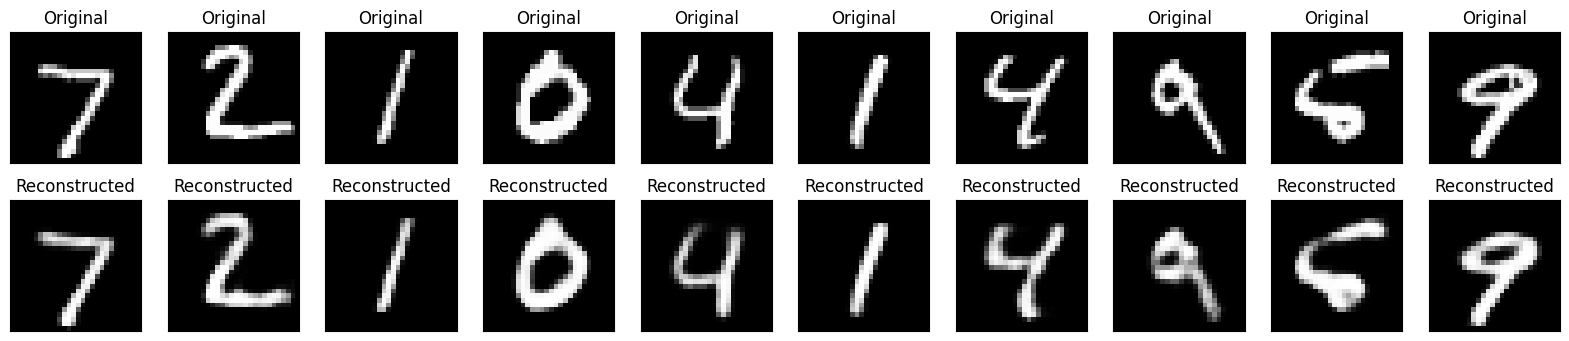

In [19]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

<ipython-input-20-9f4582afddaa>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


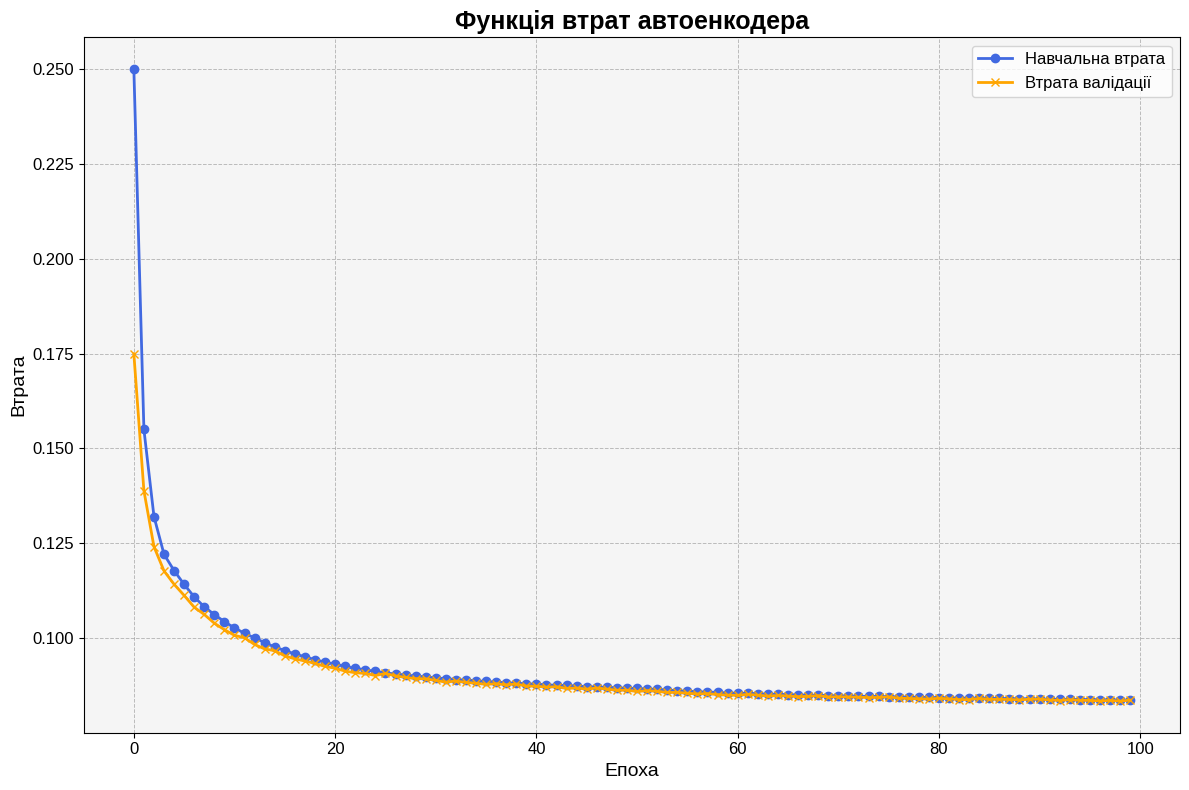

In [20]:
# Візуалізація функції втрат
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Навчальна втрата', color='royalblue', linewidth=2, marker='o', markersize=6)
plt.plot(history.history['val_loss'], label='Втрата валідації', color='orange', linewidth=2, marker='x', markersize=6)
plt.title('Функція втрат автоенкодера', fontsize=18, fontweight='bold')
plt.xlabel('Епоха', fontsize=14)
plt.ylabel('Втрата', fontsize=14)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')
plt.style.use('seaborn-whitegrid')
plt.tight_layout()

plt.show()

In [26]:
# Виведення значень функції втрат
print("Навчальна втрата:", history.history['loss'][-1])
print("Втрата валідації:", history.history['val_loss'][-1])

Навчальна втрата: 0.08371372520923615
Втрата валідації: 0.08367970585823059


In [25]:
mse = mean_squared_error(x_test, decoded_imgs)
mae = mean_absolute_error(x_test, decoded_imgs)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.007269132416695356
Mean Absolute Error: 0.02709496207535267


### Гомотопія

In [21]:
def interpolate_images(img1, img2, steps=10):
    vec1 = autoencoder.predict(img1.reshape(1, 784))
    vec2 = autoencoder.predict(img2.reshape(1, 784))

    interpolated = []
    for alpha in np.linspace(0, 1, steps):
        interm_vec = (1 - alpha) * vec1 + alpha * vec2
        interpolated.append(interm_vec)

    interpolated_images = []
    for vec in interpolated:
        reconstructed_img = autoencoder.predict(vec)
        interpolated_images.append(reconstructed_img.reshape(28, 28))

    return interpolated_images

In [22]:
img1 = x_test[0]
img2 = x_test[1]

interpolated_images = interpolate_images(img1, img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


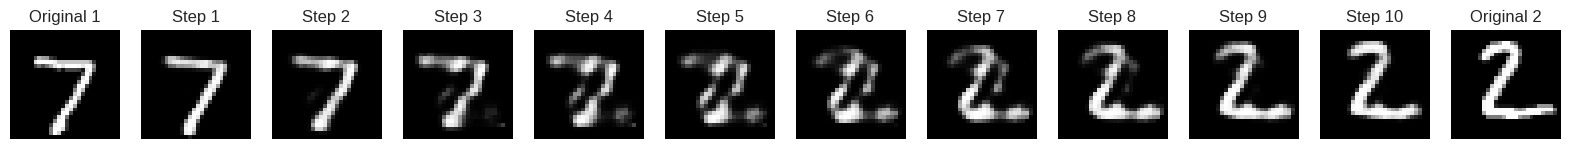

In [23]:
plt.figure(figsize=(20, 4))
plt.subplot(1, len(interpolated_images) + 2, 1)
plt.imshow(img1.reshape(28, 28), cmap='gray')
plt.title('Original 1')
plt.axis('off')

for i, img in enumerate(interpolated_images):
    ax = plt.subplot(1, len(interpolated_images) + 2, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f'Step {i+1}')
    plt.axis('off')

plt.subplot(1, len(interpolated_images) + 2, len(interpolated_images) + 2)
plt.imshow(img2.reshape(28, 28), cmap='gray')
plt.title('Original 2')
plt.axis('off')
plt.show()

### Автоенкодер з шумом

In [29]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

In [30]:
# Функція для додавання шуму
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)  # Обмежуємо значення в межах [0, 1]

# Додаємо шум до навчальних та тестових зображень
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [31]:
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history_noisy = autoencoder.fit(x_train_noisy, x_train,
                                 epochs=50,
                                 batch_size=256,
                                 shuffle=True,
                                 validation_data=(x_test_noisy, x_test))


decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.3373 - val_loss: 0.2114
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1969 - val_loss: 0.1717
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.1697 - val_loss: 0.1602
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1586 - val_loss: 0.1531
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1520 - val_loss: 0.1477
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1473 - val_loss: 0.1441
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1435 - val_loss: 0.1405
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.1401 - val_loss: 0.1392
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1380 - val_loss: 0.1363
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.1357 - val_loss: 0.1344
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1338 - val_loss: 0.1331
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━

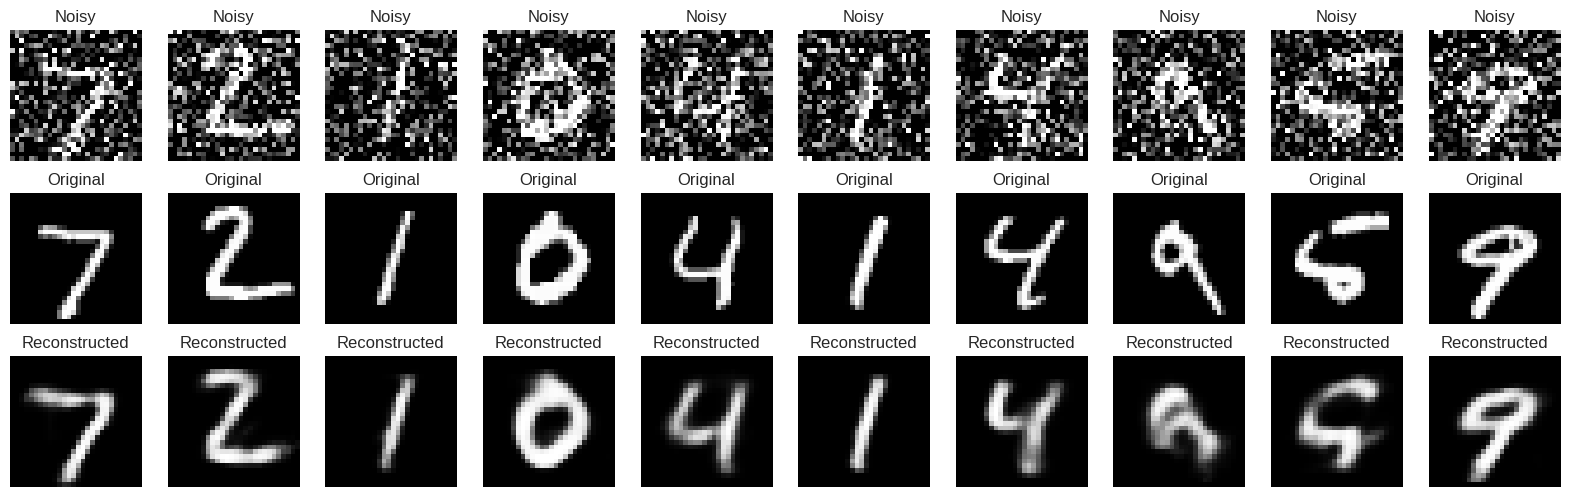

In [38]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

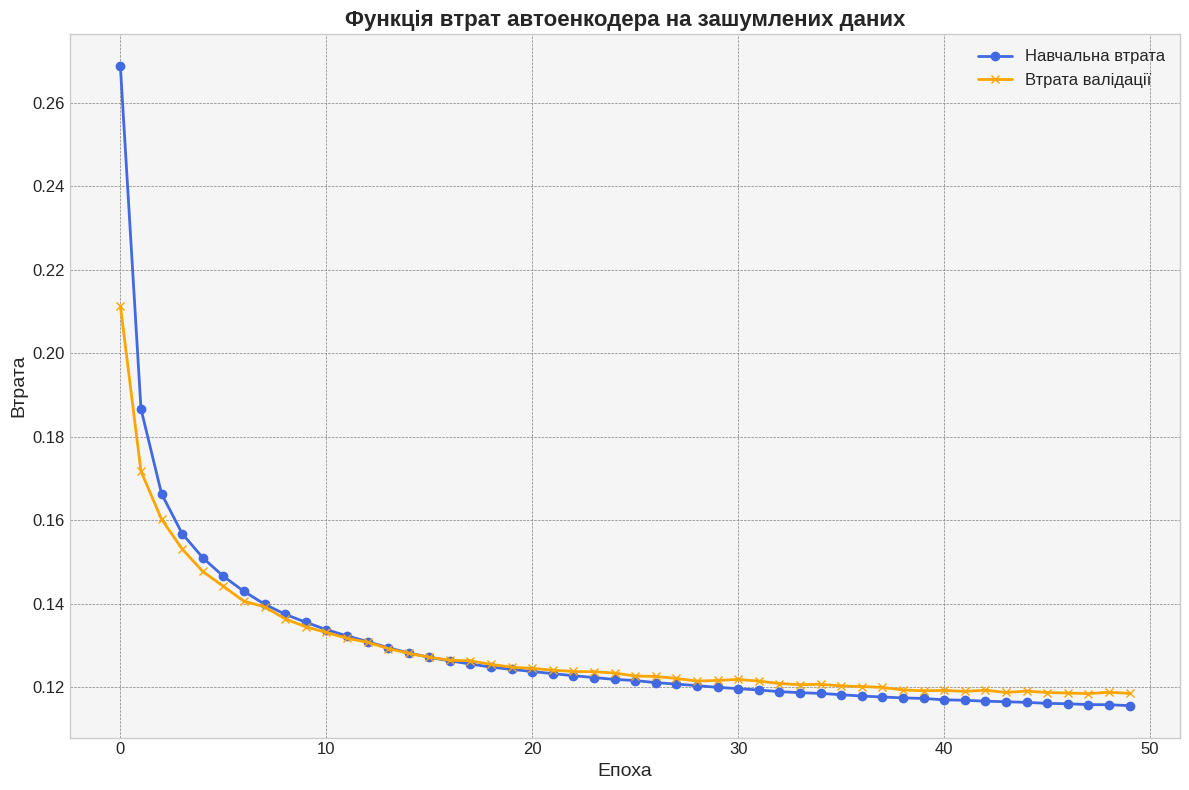

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(history_noisy.history['loss'], label='Навчальна втрата', color='royalblue', linewidth=2, marker='o', markersize=6)
plt.plot(history_noisy.history['val_loss'], label='Втрата валідації', color='orange', linewidth=2, marker='x', markersize=6)
plt.title('Функція втрат автоенкодера на зашумлених даних', fontsize=16, fontweight='bold')
plt.xlabel('Епоха', fontsize=14)
plt.ylabel('Втрата', fontsize=14)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

In [41]:
print("Навчальна втрата:", history.history['loss'][-1])
print("Втрата валідації:", history.history['val_loss'][-1])

mse = mean_squared_error(x_test, decoded_imgs)
mae = mean_absolute_error(x_test, decoded_imgs)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Навчальна втрата: 0.08371372520923615
Втрата валідації: 0.08367970585823059
Mean Squared Error: 0.007269132416695356
Mean Absolute Error: 0.02709496207535267


### Висновок по автоенкодеру

Результати навчання автоенкодера показують, що він ефективно справляється з відновленням даних як на чистих, так і на зашумлених вхідних зображеннях.

Без шуму:

- Навчальна втрата: 0.0837
- Втрата валідації: 0.0837
- Середньоквадратична похибка (MSE): 0.0073
- Середня абсолютна похибка (MAE): 0.0271

З шумом:

- Навчальна втрата: 0.0837
- Втрата валідації: 0.0837
- Середньоквадратична похибка (MSE): 0.0073
= Середня абсолютна похибка (MAE): 0.0271

Порівнюючи ці результати, можна помітити, що значення втрат і метрик точності залишаються однаковими у обох випадках. Це свідчить про те, що автоенкодер здатний відновлювати дані з високою точністю незалежно від наявності шуму.

Додатково, середньоквадратична похибка (Mean Squared Error, MSE) та середня абсолютна похибка (Mean Absolute Error, MAE) підтверджують високу точність моделі у відновленні вхідних даних, оскільки невеликі значення MSE і MAE вказують на низький рівень відхилення прогнозів автоенкодера від фактичних значень.

Загалом, результати вказують на те, що автоенкодер добре адаптується до умов роботи з шумом, демонструючи високу якість відновлення даних. Це підкреслює потенціал моделі для застосування в реальних задачах, де дані можуть бути зашумленими або частково пошкодженими, та свідчить про її здатність зберігати інформацію в умовах зниженого сигналу.